In [2]:
### 2019-12-18 at Office


import torch
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset
from  torch.autograd import Variable
import torch.optim as optim
from torchvision import datasets, transforms
import torchvision.models as models
#import lenstronomy.Util.image_util as image_util
import os, sys
import h5py
import pandas as pd
import numpy as np
import scipy.ndimage
from scipy.ndimage import gaussian_filter
from scipy.ndimage import rotate
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from tqdm import tqdm
import gc
import astropy
from astropy.io import fits
from astropy.table import Table


root_folder = "/media/joshua/HDD_fun2/Public/"
loaded_model_path = './saved_model/2019-12-19criteria_resnet18.mdl'
# EHT_test_path = root_folder + test_folder
# files = os.listdir(EHT_test_path)
#loaded_model_path = './saved_model/flux_resnet18.mdl'


if os.path.exists(loaded_model_path):
    net = torch.load(loaded_model_path)
    print('loaded mdl！')
else:
    print('No model to load. Should stop!')
    
print(os.getcwd())

normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],std=[0.229, 0.224, 0.225])
data_transform = transforms.Compose([
            transforms.ToTensor(), # scale to [0,1] and convert to tensor
            normalize,
            ])
target_transform = torch.Tensor




loaded mdl！
/home/joshua/Documents/git_work_zone/Lens_Finder


lens dirs 4


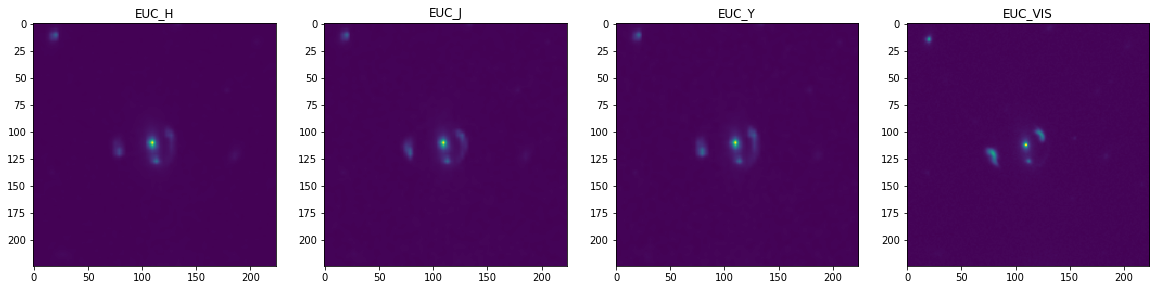

prediction score: 0.93027294


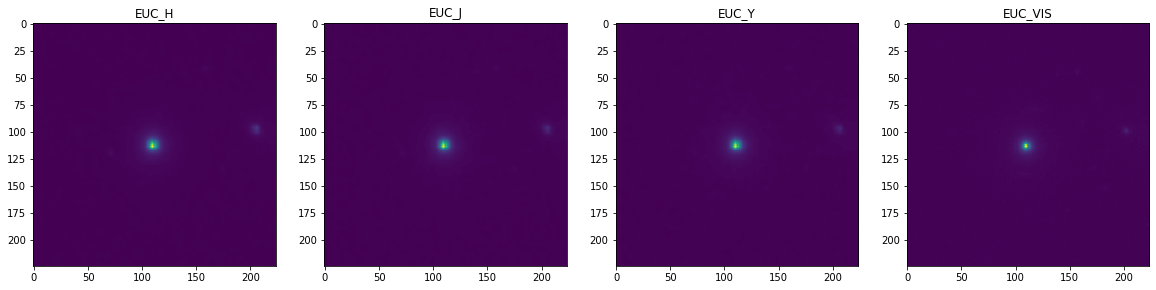

prediction score: 0.89419484


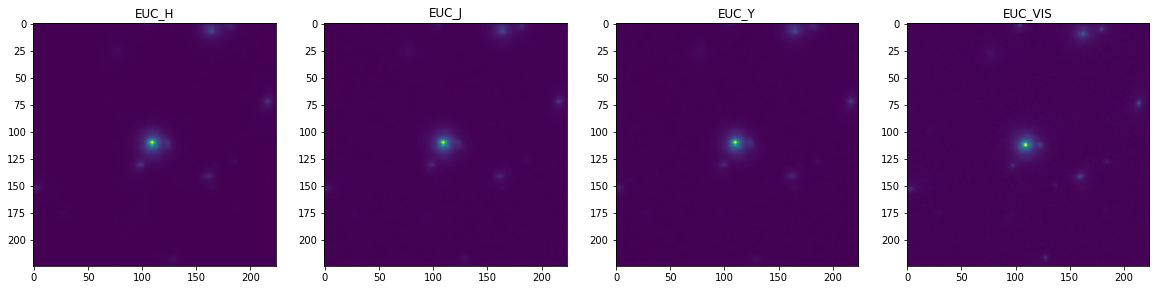

prediction score: 0.53870684


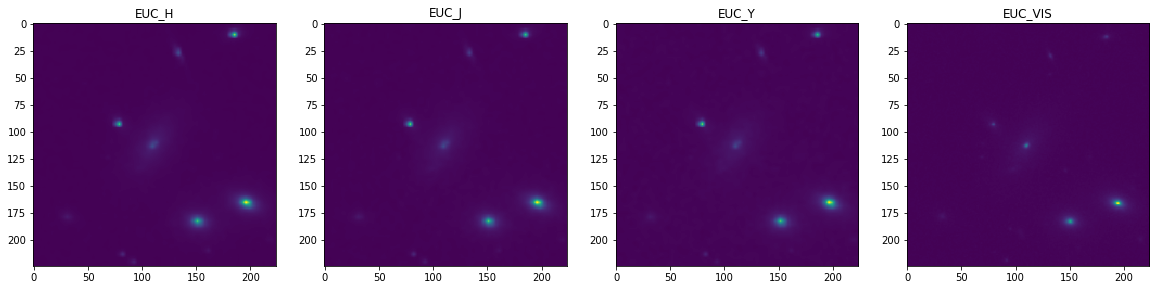

prediction score: 0.79923314


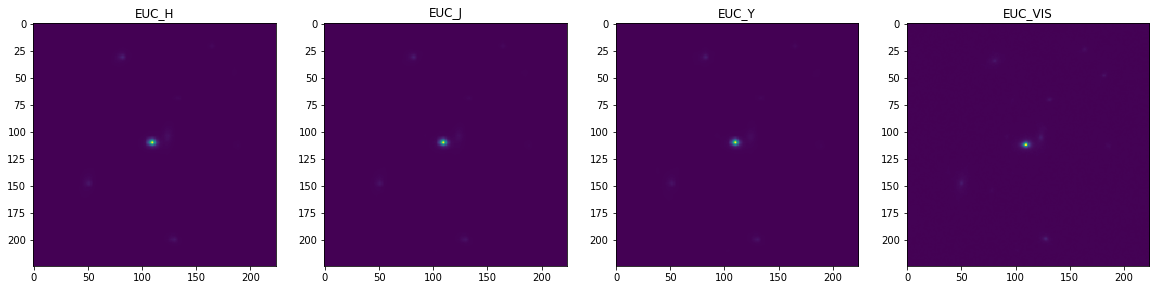

prediction score: 0.57855725


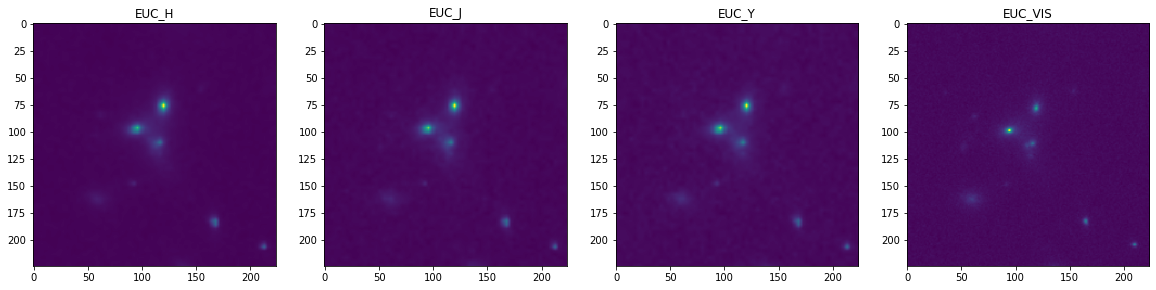

prediction score: 0.59726673


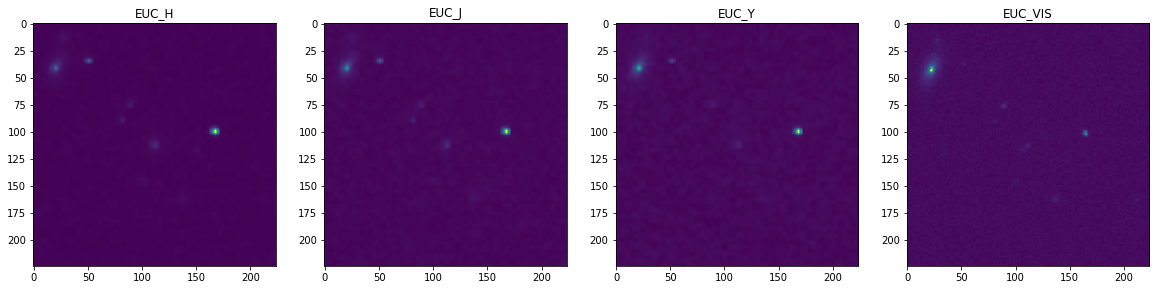

prediction score: 0.6810058


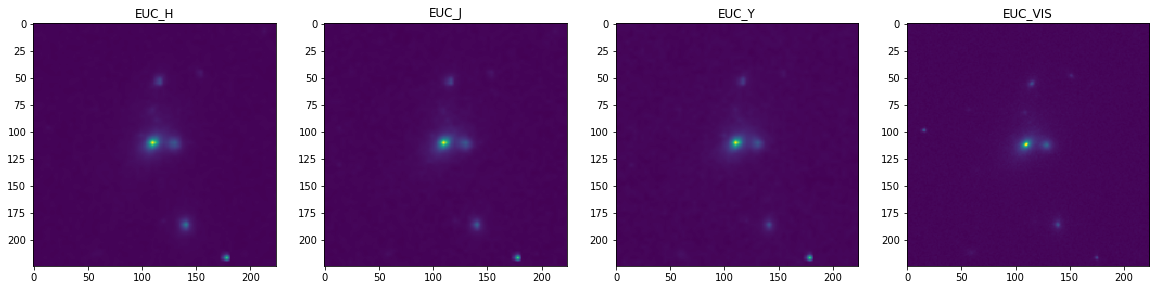

prediction score: 0.42674297


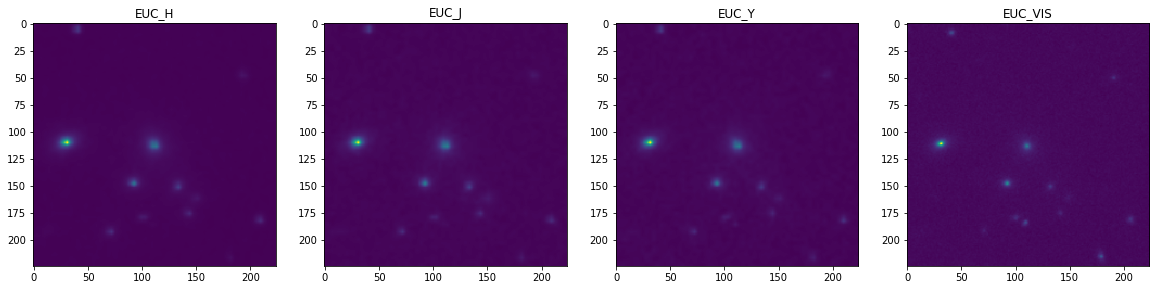

prediction score: 0.6029584


In [16]:
### blind data file path
subfolder = "/media/joshua/HDD_fun2/Lens_finder_test/Public/"
#path = "./images/" + subfolder
dirs = os.listdir(subfolder)
print("lens dirs", len(dirs))

image = np.zeros((4, 224, 224))
channel_names = ['EUC_H', 'EUC_J', 'EUC_Y', 'EUC_VIS']

ID_list = []
score_list = []

for ID in range(200001, 200010):
    plt.figure(figsize=(20, 5))
    image = np.zeros((4, 224, 224))
    for i, channel in enumerate(channel_names):
        filepath = root_folder + channel + "/image" + channel + "-" + str(ID) + ".fits"
        lens_data = fits.open(filepath)
        img = lens_data[0].data
        img_channel_0 = scipy.ndimage.zoom(img, 224/img.shape[0], order=1)
        image[i, :, :] += img_channel_0
        plt.subplot(1, 4, i+ 1)
        plt.imshow(image[i, :, :])
        plt.title(channel)
    plt.show()
    image *= 10e8
    blind_image = torch.from_numpy(image).float().cuda().unsqueeze(0)

    ### flux output
    blind_output = net(blind_image)
    blind_output = F.sigmoid(blind_output)
    print("prediction score:", blind_output.data.cpu().numpy()[0][0])
    ID_list.append(str(ID))
    score_list.append(blind_output.data.cpu().numpy()[0][0])

In [19]:
df = pd.DataFrame()
df['ID'] = ID_list
df['score'] = score_list

df.head()

#df.to_csv("Lens_finding_challenge_submission.csv")

,ID,score
0,200001,0.930273
1,200002,0.894195
2,200003,0.538707
3,200004,0.799233
4,200005,0.578557
